In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow

from tensorflow.keras import models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TimeDistributed

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, Conv3D, Flatten, Dropout, Dense, BatchNormalization, Activation, GaussianNoise, LSTM
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPool3D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:
!unzip /content/drive/MyDrive/gwbz3fsgp8-2.zip

Archive:  /content/drive/MyDrive/gwbz3fsgp8-2.zip
   creating: ECG Images of Patient that have History of MI (172x12=2064)/
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(64).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(136).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(172).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(28).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(82).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(154).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(118).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(46).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(145).jpg  
  inflating: ECG Images of Patient that have History of MI (172x12=2064)/PMI(73).jpg  
 

In [ ]:
import shutil
DATADIR='/content/Data'
os.mkdir("/content/Data")
shutil.move("/content/ECG Images of Myocardial Infarction Patients (240x12=2880)", DATADIR)
shutil.move("/content/ECG Images of Patient that have History of MI (172x12=2064)", DATADIR)
shutil.move("/content/ECG Images of Patient that have abnormal heartbeat (233x12=2796)", DATADIR)
shutil.move("/content/Normal Person ECG Images (284x12=3408)", DATADIR)


'/content/Data/Normal Person ECG Images (284x12=3408)'

In [ ]:
cd /content/Data

/content/Data


In [ ]:
for _ in os.listdir('/content/Data/ECG Images of Patient that have History of MI (172x12=2064)'):
  path=os.path.join('/content/Data/ECG Images of Patient that have History of MI (172x12=2064)',_)
  shutil.move(path,'/content/Data/ECG Images of Myocardial Infarction Patients (240x12=2880)')


In [ ]:
os.rename('ECG Images of Myocardial Infarction Patients (240x12=2880)', 'Myocardial Infarction')
os.rename('ECG Images of Patient that have abnormal heartbeat (233x12=2796)', 'abnormal heartbeat')
os.rename('Normal Person ECG Images (284x12=3408)', 'Normal')

In [ ]:
im=cv2.imread('/content/Data/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(1).jpg')
im = im[283:1516, 68:]
plt.figure(figsize=(40, 40), dpi=80)
plt.imshow(im)
plt.show()

In [ ]:
os.mkdir("/content/Data1")

In [ ]:
DATADIR='/content/Data'
path1='/content/Data1'
for folder in os.listdir(DATADIR):
  if folder!='.ipynb_checkpoints':
    folder_path=os.path.join(DATADIR,folder)
    print(folder_path)
    os.mkdir(os.path.join(path1,folder))
    store_folder=os.path.join(path1,folder)
    for files in os.listdir(folder_path):
      file_path=os.path.join(folder_path,files)
      img=cv2.imread(file_path)
      img = img[283:1516, 68:]
      img=cv2.resize(img, (500, 500),
                interpolation = cv2.INTER_CUBIC)
      store_file=os.path.join(store_folder,files)
      cv2.imwrite(store_file,img)
      



/content/Data/abnormal heartbeat
/content/Data/Normal
/content/Data/Myocardial Infarction


In [ ]:

import os
import math 

files={}
dir='/content/Data'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
print(arr1)
  



  

.ipynb_checkpoints 0
abnormal heartbeat 233
Normal 284
Myocardial Infarction 411
[]


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import splitfolders # or import splitfolders
input_folder = "/content/Data1"
output = "/content" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=1337, ratio=(.7, .2, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 928 files [00:00, 2090.49 files/s]


In [ ]:
!zip -r '/content/drive/MyDrive/train.zip' '/content/train'
!zip -r '/content/drive/MyDrive/test.zip' '/content/test'
!zip -r '/content/drive/MyDrive/val.zip' '/content/val'

  adding: content/train/ (stored 0%)
  adding: content/train/.ipynb_checkpoints/ (stored 0%)
  adding: content/train/abnormal heartbeat/ (stored 0%)
  adding: content/train/abnormal heartbeat/HB(206).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(94).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(118).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(29).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(124).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(150).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(80).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(224).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(209).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(139).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(186).jpg (deflated 0%)
  adding: content/train/abnormal heartbeat/HB(154).jpg (deflated 0%)
  adding: content/train/ab

Train

In [ ]:

import os
import math 

files={}
dir='/content/train'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
print(arr1)
  



  

.ipynb_checkpoints 0
abnormal heartbeat 163
Normal 198
Myocardial Infarction 287
[]


valid

In [ ]:
files={}
dir='/content/val'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
print(arr1)

.ipynb_checkpoints 0
abnormal heartbeat 46
Normal 56
Myocardial Infarction 82
[]


Test

In [ ]:
files={}
dir='/content/test'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
print(arr1)

.ipynb_checkpoints 0
abnormal heartbeat 24
Normal 30
Myocardial Infarction 42
[]


Run from here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/train.zip'
!unzip '/content/drive/MyDrive/val.zip'
!unzip '/content/drive/MyDrive/test.zip'

Archive:  /content/drive/MyDrive/train.zip
   creating: content/train/
   creating: content/train/.ipynb_checkpoints/
   creating: content/train/abnormal heartbeat/
  inflating: content/train/abnormal heartbeat/HB(206).jpg  
  inflating: content/train/abnormal heartbeat/HB(94).jpg  
  inflating: content/train/abnormal heartbeat/HB(118).jpg  
  inflating: content/train/abnormal heartbeat/HB(29).jpg  
  inflating: content/train/abnormal heartbeat/HB(124).jpg  
  inflating: content/train/abnormal heartbeat/HB(150).jpg  
  inflating: content/train/abnormal heartbeat/HB(80).jpg  
  inflating: content/train/abnormal heartbeat/HB(224).jpg  
  inflating: content/train/abnormal heartbeat/HB(209).jpg  
  inflating: content/train/abnormal heartbeat/HB(139).jpg  
  inflating: content/train/abnormal heartbeat/HB(186).jpg  
  inflating: content/train/abnormal heartbeat/HB(154).jpg  
  inflating: content/train/abnormal heartbeat/HB(194).jpg  
  inflating: content/train/abnormal heartbeat/HB(53).jpg  

In [ ]:
import tensorflow

from tensorflow.keras import models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TimeDistributed

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, Conv3D, Flatten, Dropout, Dense, BatchNormalization, Activation, GaussianNoise, LSTM
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPool3D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import cv2
import os
import numpy as np
from PIL import Image as im

In [ ]:
DATADIR='/content/content/train'
CATEGORIES=['abnormal heartbeat','Normal',
'Myocardial Infarction']
DATADIR1="/content/content/val"
DATADIR2='/content/content/test'








In [ ]:
traning_data=[]
test_data=[]
img_size=256
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        test_data.append([new_arr,class_num])
      except Exception as e:
        pass
create_traning_data()
create_test_data()


In [ ]:
print(len(traning_data))
print(len(test_data))

648
184


In [ ]:
train_x=[]
train_y=[]
for features,label in traning_data:
  train_x.append(features)
  train_y.append(label)
test_x=[]
test_y=[]
for features,label in test_data:
  test_x.append(features)
  test_y.append(label)



In [ ]:
del traning_data
del test_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,1)
test_x=np.array(test_x).reshape(-1,img_size,img_size,1)


In [ ]:
print(train_x.shape)

(648, 256, 256, 1)


In [ ]:
x_train, x_test, y_train, y_test=train_x,test_x,train_y,test_y
del train_x,test_x,train_y,test_y

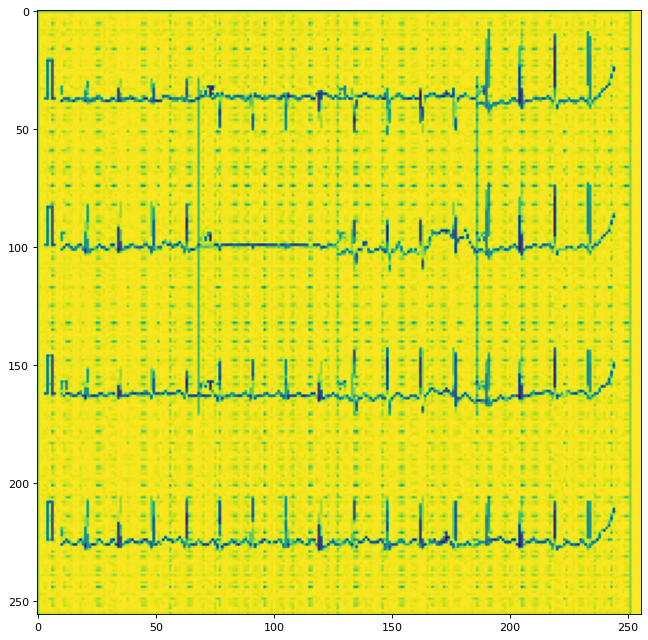

In [ ]:
c_a=x_train[0]
c_a=np.array(c_a)*255
c_a=c_a.astype(np.uint8)
c_a = np.squeeze(c_a, axis=2)
c_a = im.fromarray(c_a)
plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(c_a)
plt.show()

In [ ]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
print('train groups:', [x.shape[0] for x in train_groups])
print('valid groups:', [x.shape[0] for x in test_groups])
print(np.unique(y_train))

train groups: [163, 198, 287]
valid groups: [46, 56, 82]
[0 1 2]


In [ ]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1]*batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize
            
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

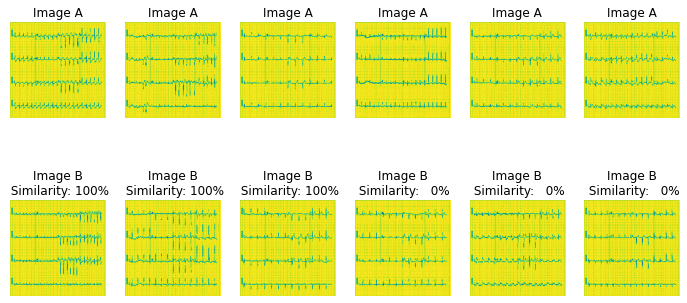

In [ ]:
from PIL import Image as im
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))

for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
  
    c_a=np.array(c_a)*255
    c_a=c_a.astype(np.uint8)
    c_a = np.squeeze(c_a, axis=2)
    c_a = im.fromarray(c_a)
    
    ax1.imshow(c_a)
    c_b=np.array(c_b)*255
    c_b=c_b.astype(np.uint8)
    c_b = np.squeeze(c_b, axis=2)
    c_b = im.fromarray(c_b)
    
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b)
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')
    

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
img_in = Input(shape = x_train.shape[1:], name = 'FeatureNet_ImageInput')
n_layer = img_in
for i in range(2):
    n_layer = Conv2D(8*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = Conv2D(16*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = MaxPool2D((2,2))(n_layer)
n_layer = Flatten()(n_layer)
n_layer = Dense(128, activation = 'linear')(n_layer)
n_layer = Dropout(0.2)(n_layer)
n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
feature_model.summary()

Model: "FeatureGenerationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeatureNet_ImageInput (Inpu  [(None, 256, 256, 1)]    0         
 tLayer)                                                         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 252, 25

In [ ]:
from keras.layers import concatenate
img_a_in = Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = Input(shape = x_train.shape[1:], name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(64, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(32, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 FeatureGenerationModel (Functi  (None, 128)         15250352    ['ImageA_Input[0][0]',           
 onal)                                                            'ImageB_Input[0][

In [ ]:
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

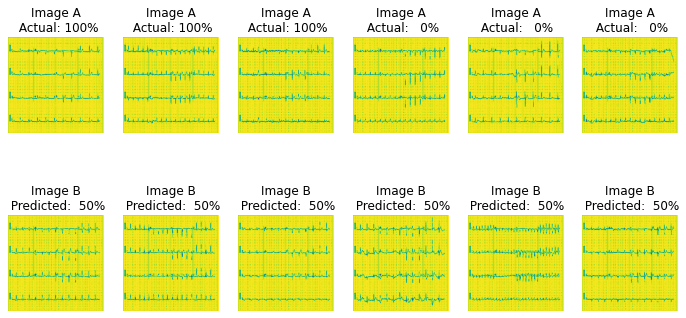

In [ ]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        c_a=np.array(c_a)*255
        c_a=c_a.astype(np.uint8)
        c_a = np.squeeze(c_a, axis=2)
        c_a = im.fromarray(c_a)

        c_b=np.array(c_b)*255
        c_b=c_b.astype(np.uint8)
        c_b = np.squeeze(c_b, axis=2)
        c_b = im.fromarray(c_b)
      
        ax1.imshow(c_a)
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b)
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig
# a completely untrained model
_ = show_model_output()

In [ ]:
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        yield [pv_a, pv_b], pv_sim
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(test_groups)
loss_history = similarity_model.fit_generator(siam_gen(train_groups), 
                               steps_per_epoch = 40,
                               validation_data=([valid_a, valid_b], valid_sim),
                                              epochs = 20,
                                             verbose = True)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


40/40 [==============================] - 295s 7s/step - loss: 0.7891 - accuracy: 0.5016 - val_loss: 0.7346 - val_accuracy: 0.5000
Epoch 2/20
40/40 [==============================] - 291s 7s/step - loss: 0.7521 - accuracy: 0.4883 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 3/20
40/40 [==============================] - 296s 7s/step - loss: 0.7241 - accuracy: 0.5305 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/20
40/40 [==============================] - 293s 7s/step - loss: 0.6868 - accuracy: 0.5711 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/20
40/40 [==============================] - 296s 7s/step - loss: 0.6704 - accuracy: 0.5750 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 6/20
40/40 [==============================] - 294s 7s/step - loss: 0.6425 - accuracy: 0.6500 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 7/20
40/40 [==============================] - 294s 7s/step - loss: 0.6285 - accuracy: 0.6609 - val_loss: 0.7393 - val_accuracy: 0.4375
Epoch 8/20
40/40 [======

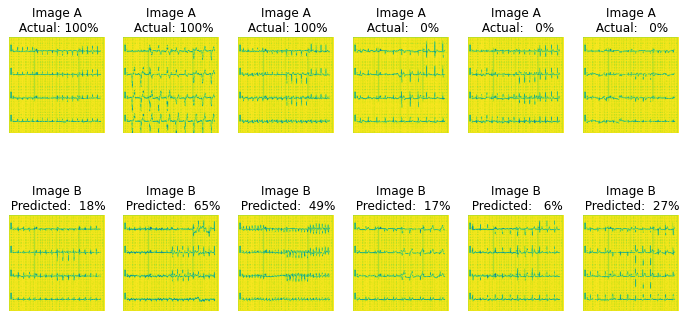

In [ ]:
_ = show_model_output()

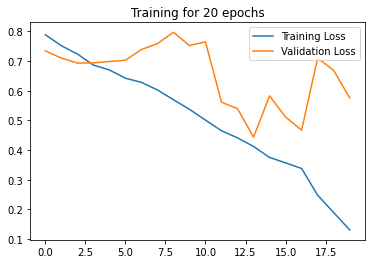

In [ ]:
plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['val_loss'])
plt.title('Training for ' +str(20)+ ' epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

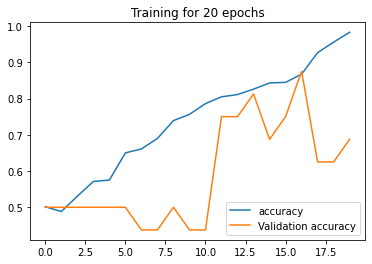

In [ ]:
plt.plot(loss_history.history['accuracy'])
plt.plot(loss_history.history['val_accuracy'])
plt.title('Training for ' +str(20)+ ' epochs')
plt.legend(['accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model
similarity_model.save('/content/drive/MyDrive/Siamese_Networks_model1.h5')

In [ ]:
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        yield [pv_a, pv_b], pv_sim
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(test_groups,1024)
loss_history = similarity_model.fit_generator(siam_gen(train_groups), 
                               steps_per_epoch = 40,
                               validation_data=([valid_a, valid_b], valid_sim),
                                              epochs = 20,
                                             verbose = True)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


40/40 [==============================] - 394s 10s/step - loss: 0.1101 - accuracy: 0.9844 - val_loss: 1.5622 - val_accuracy: 0.5068
Epoch 2/20
40/40 [==============================] - 389s 10s/step - loss: 0.0913 - accuracy: 0.9844 - val_loss: 0.4831 - val_accuracy: 0.8013
Epoch 3/20
40/40 [==============================] - 389s 10s/step - loss: 0.0744 - accuracy: 0.9859 - val_loss: 0.5157 - val_accuracy: 0.7979
Epoch 4/20
40/40 [==============================] - 391s 10s/step - loss: 0.0665 - accuracy: 0.9906 - val_loss: 0.8269 - val_accuracy: 0.6606
Epoch 5/20
40/40 [==============================] - 383s 10s/step - loss: 0.0518 - accuracy: 0.9945 - val_loss: 0.3539 - val_accuracy: 0.8862
Epoch 6/20
40/40 [==============================] - 386s 10s/step - loss: 0.0485 - accuracy: 0.9922 - val_loss: 0.6754 - val_accuracy: 0.7441
Epoch 7/20
40/40 [==============================] - 380s 10s/step - loss: 0.0370 - accuracy: 0.9969 - val_loss: 0.3603 - val_accuracy: 0.8755
Epoch 8/20
40/40 

KeyboardInterrupt: ignored

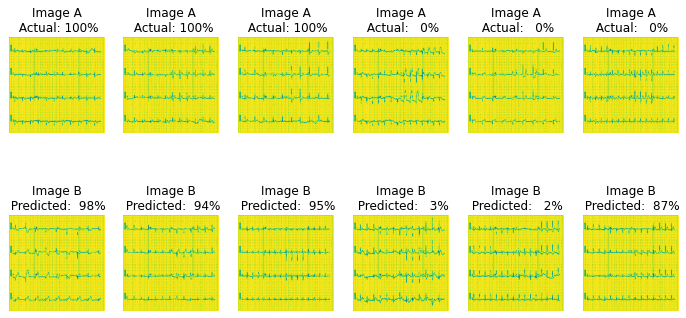

In [ ]:
_ = show_model_output()

In [ ]:
similarity_model.history.history

{}

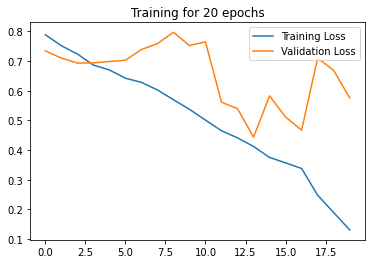

In [ ]:
plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['val_loss'])
plt.title('Training for ' +str(20)+ ' epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

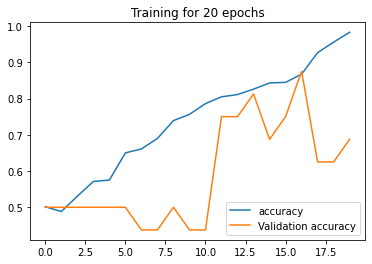

In [ ]:
plt.plot(loss_history.history['accuracy'])
plt.plot(loss_history.history['val_accuracy'])
plt.title('Training for ' +str(20)+ ' epochs')
plt.legend(['accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

In [ ]:
from keras.models import load_model
similarity_model.save('/content/drive/MyDrive/Siamese_Networks_model2.h5')

In [ ]:
img=cv2.imread('/content/train/Myocardial Infarction/MI(1).jpg',0)
plt.figure(figsize=(40, 40), dpi=80)
plt.imshow(img)
plt.show()

In [ ]:
from keras.models import load_model
similarity_model=load_model('/content/drive/MyDrive/Siamese_Networks_model2.h5')

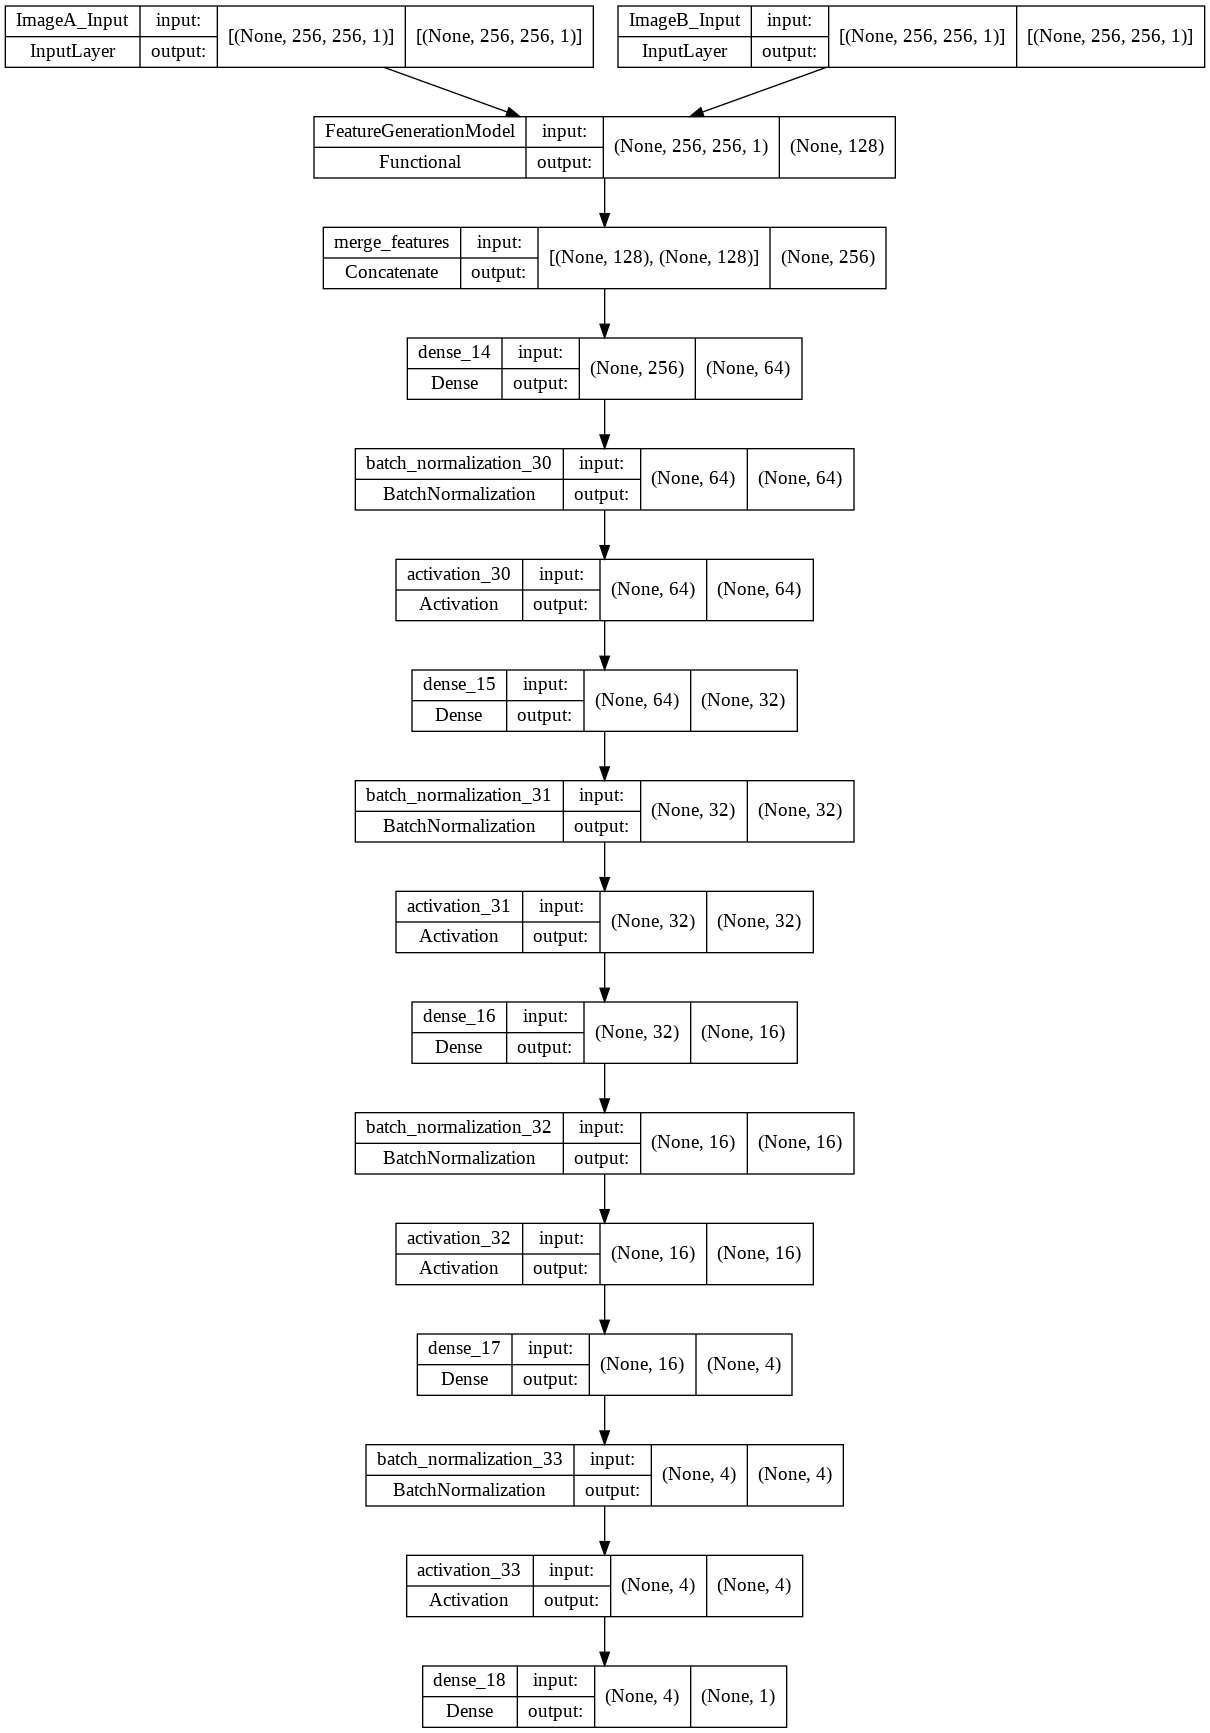

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(similarity_model, 'compress.png', show_shapes=True)

In [ ]:
arr1=CATEGORIES

In [ ]:
import random

In [ ]:
from PIL import Image
mp1={
    
}
mp2={
    
}
for i in arr1:
  mp1[i]=np.array([])
  mp2[i]=np.array([])

In [ ]:

traning_data=[]
test_data=[]
y_pred=[]
y_actual=[]

a=[]
img_size=256
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        a.append(temp_arr1)
        break
      except Exception as e:
        pass

def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
      
    
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    temp_arr2=0
    i=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)
      except Exception as e:
        pass

def create_test_data():
  c=0
  for category in CATEGORIES:
    path=os.path.join('/content/content/test',category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=a[c]
          i+=1
          c+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
create_traning_data()
#create_test_data()
#create_test_data()


In [ ]:
from random import choice
arr2=[]
arr3=[]
for i in mp1:
  c=0
  for j in mp1[i]:
    if j==1:
      arr2.append(i)
    else:
      arr2.append(arr1[choice([k for k in range(0,3) if k !=i])])
  c=0
  for j in mp2[i]:
    if j==1:
      arr3.append(i)
  


In [ ]:
arr4=[]
for i in range(21):
  arr4.append(i)

Training

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(arr2, arr3, labels=arr1))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(arr2, arr3, labels=arr1))

[[163   2   6]
 [  0 196   6]
 [  0   0 275]]
                       precision    recall  f1-score   support

   abnormal heartbeat       1.00      0.95      0.98       171
               Normal       0.99      0.97      0.98       202
Myocardial Infarction       0.96      1.00      0.98       275

             accuracy                           0.98       648
            macro avg       0.98      0.97      0.98       648
         weighted avg       0.98      0.98      0.98       648



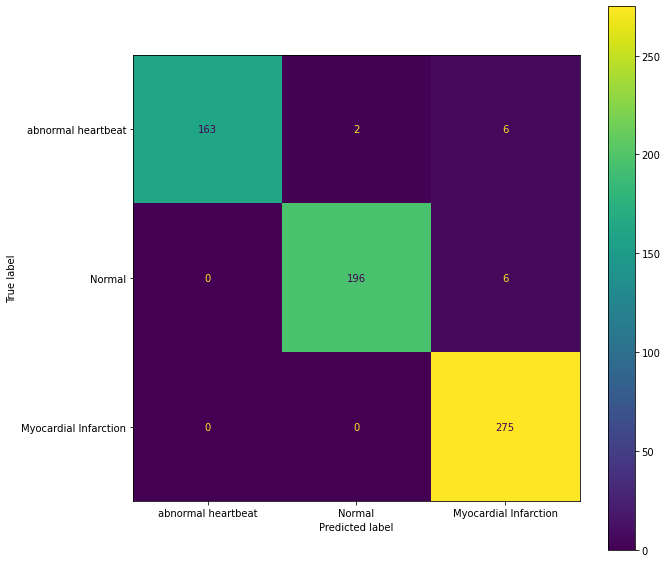

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cn=metrics.confusion_matrix(arr2, arr3, labels=arr1)
cmd = ConfusionMatrixDisplay(cn, display_labels=arr1)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
fig.savefig('Training.png')
#cmd.plot()
#sn.heatmap(cn, annot=True)


In [ ]:
from PIL import Image
mp1={
    
}
mp2={
    
}
for i in arr1:
  mp1[i]=np.array([])
  mp2[i]=np.array([])

In [ ]:

traning_data=[]
test_data=[]
y_pred=[]
y_actual=[]

a=[]
img_size=256
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        a.append(temp_arr1)
        break
      except Exception as e:
        pass

def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
      
    
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    temp_arr2=0
    i=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)
      except Exception as e:
        pass

def create_test_data():
  c=0
  for category in CATEGORIES:
    path=os.path.join('/content/content/test',category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=a[c]
          i+=1
          c+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
#create_traning_data()
create_val_data()
#create_test_data()


In [ ]:
from random import choice
arr2=[]
arr3=[]
for i in mp1:
  c=0
  for j in mp1[i]:
    if j==1:
      arr2.append(i)
    else:
      arr2.append(arr1[choice([k for k in range(0,3) if k !=i])])
  c=0
  for j in mp2[i]:
    if j==1:
      arr3.append(i)
  


Validation

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(arr2, arr3, labels=arr1))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(arr2, arr3, labels=arr1))

[[46 13  4]
 [ 0 35  7]
 [ 0  8 71]]
                       precision    recall  f1-score   support

   abnormal heartbeat       1.00      0.73      0.84        63
               Normal       0.62      0.83      0.71        42
Myocardial Infarction       0.87      0.90      0.88        79

             accuracy                           0.83       184
            macro avg       0.83      0.82      0.81       184
         weighted avg       0.86      0.83      0.83       184



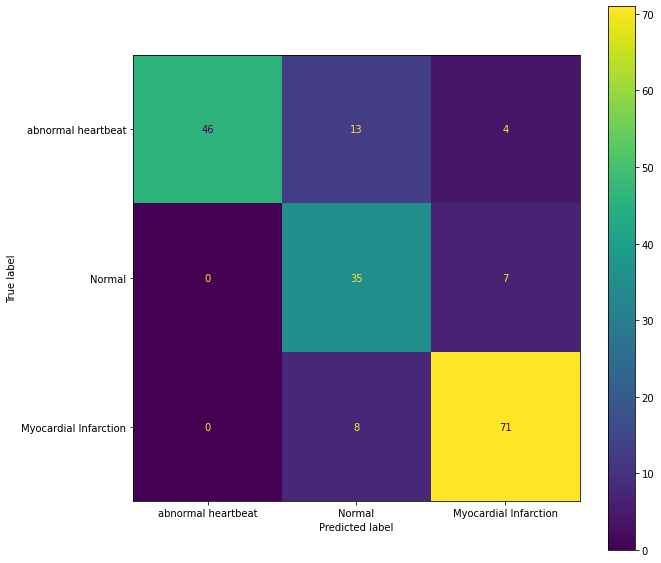

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cn=metrics.confusion_matrix(arr2, arr3, labels=arr1)
cmd = ConfusionMatrixDisplay(cn, display_labels=arr1)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
fig.savefig('valid.png')
#cmd.plot()
#sn.heatmap(cn, annot=True)


In [ ]:
from PIL import Image
mp1={
    
}
mp2={
    
}
for i in arr1:
  mp1[i]=np.array([])
  mp2[i]=np.array([])

In [ ]:

traning_data=[]
test_data=[]
y_pred=[]
y_actual=[]

a=[]
img_size=256
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        a.append(temp_arr1)
        break
      except Exception as e:
        pass

def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.5:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
      
    
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    temp_arr2=0
    i=0
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=temp_arr1
          i+=1
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.5:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)
      except Exception as e:
        pass

def create_test_data():
  c=0
  for category in CATEGORIES:
    path=os.path.join('/content/content/test',category)
    class_num=CATEGORIES.index(category)
    i=0
    temp_arr2=0
    
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),0)
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        temp_arr1=[]
        temp_arr1.append(new_arr)
        temp_arr1=np.stack(temp_arr1,0)
        if i==0:
          temp_arr2=a[c]
          i+=1
          c+=1

        
        
        mp2[category]=np.append(mp2[category],1)
        
        
        for x in similarity_model.predict([temp_arr2,temp_arr1]):
          if x>=0.8:
            mp1[category]=np.append(mp1[category],1)
          else:
            mp1[category]=np.append(mp1[category],0)



        
    
  

        #traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
#create_traning_data()
create_test_data()
#create_test_data()


In [ ]:
from random import choice
arr2=[]
arr3=[]
for i in mp1:
  c=0
  for j in mp1[i]:
    if j==1:
      arr2.append(i)
    else:
      arr2.append(arr1[choice([k for k in range(0,3) if k !=i])])
  c=0
  for j in mp2[i]:
    if j==1:
      arr3.append(i)
  


Test data

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(arr2, arr3, labels=arr1))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(arr2, arr3, labels=arr1))

[[24  2  4]
 [ 0 26  2]
 [ 0  2 36]]
                       precision    recall  f1-score   support

   abnormal heartbeat       1.00      0.80      0.89        30
               Normal       0.87      0.93      0.90        28
Myocardial Infarction       0.86      0.95      0.90        38

             accuracy                           0.90        96
            macro avg       0.91      0.89      0.90        96
         weighted avg       0.90      0.90      0.90        96



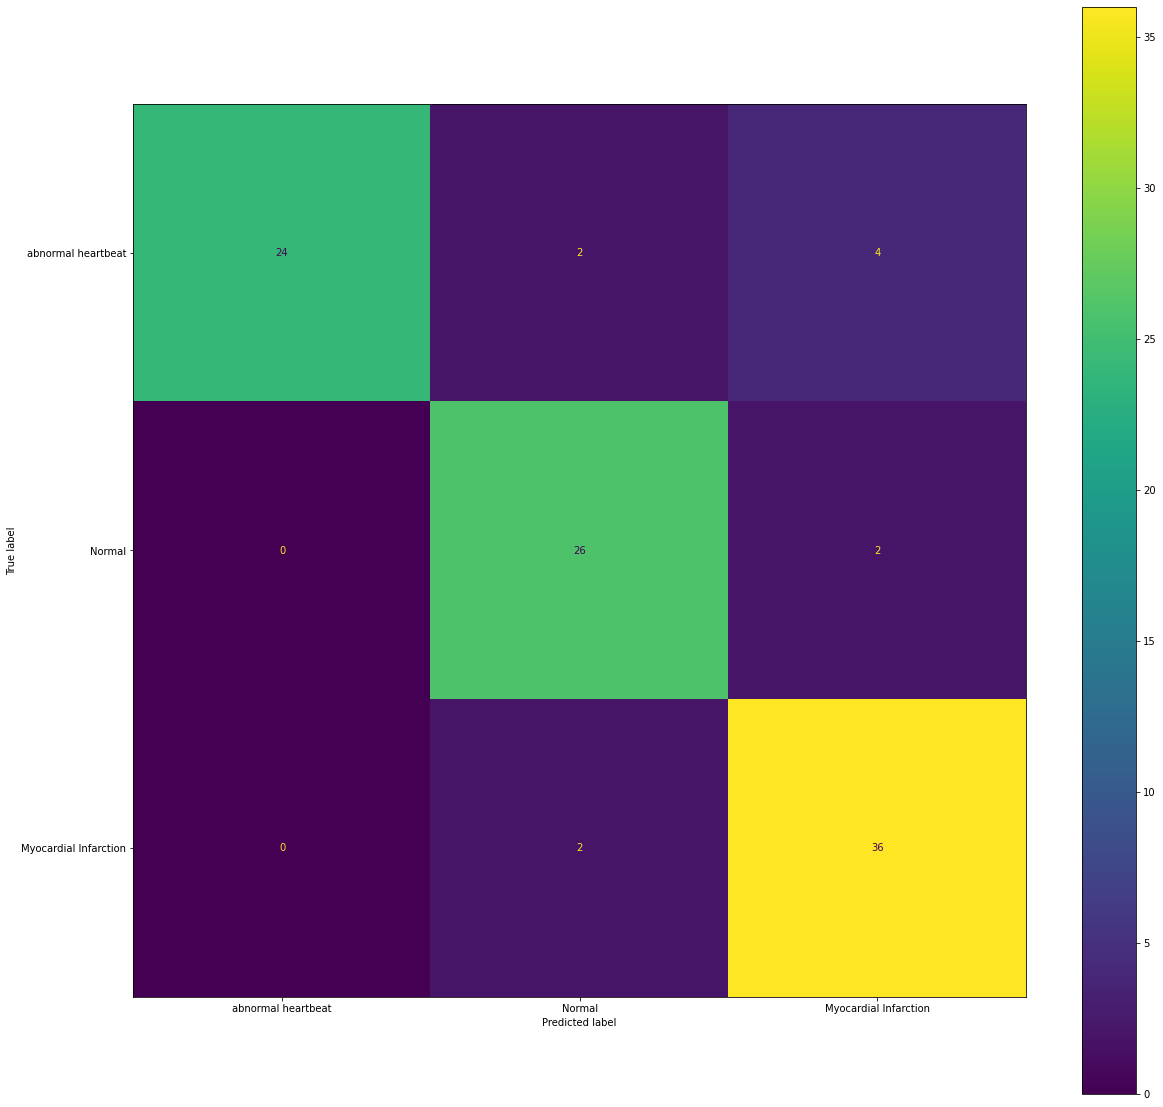

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cn=metrics.confusion_matrix(arr2, arr3, labels=arr1)
cmd = ConfusionMatrixDisplay(cn, display_labels=arr1)
fig, ax = plt.subplots(figsize=(20,20))
cmd.plot(ax=ax)
fig.savefig('test.png')
#cmd.plot()
#sn.heatmap(cn, annot=True)


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 25.0 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import visualkeras

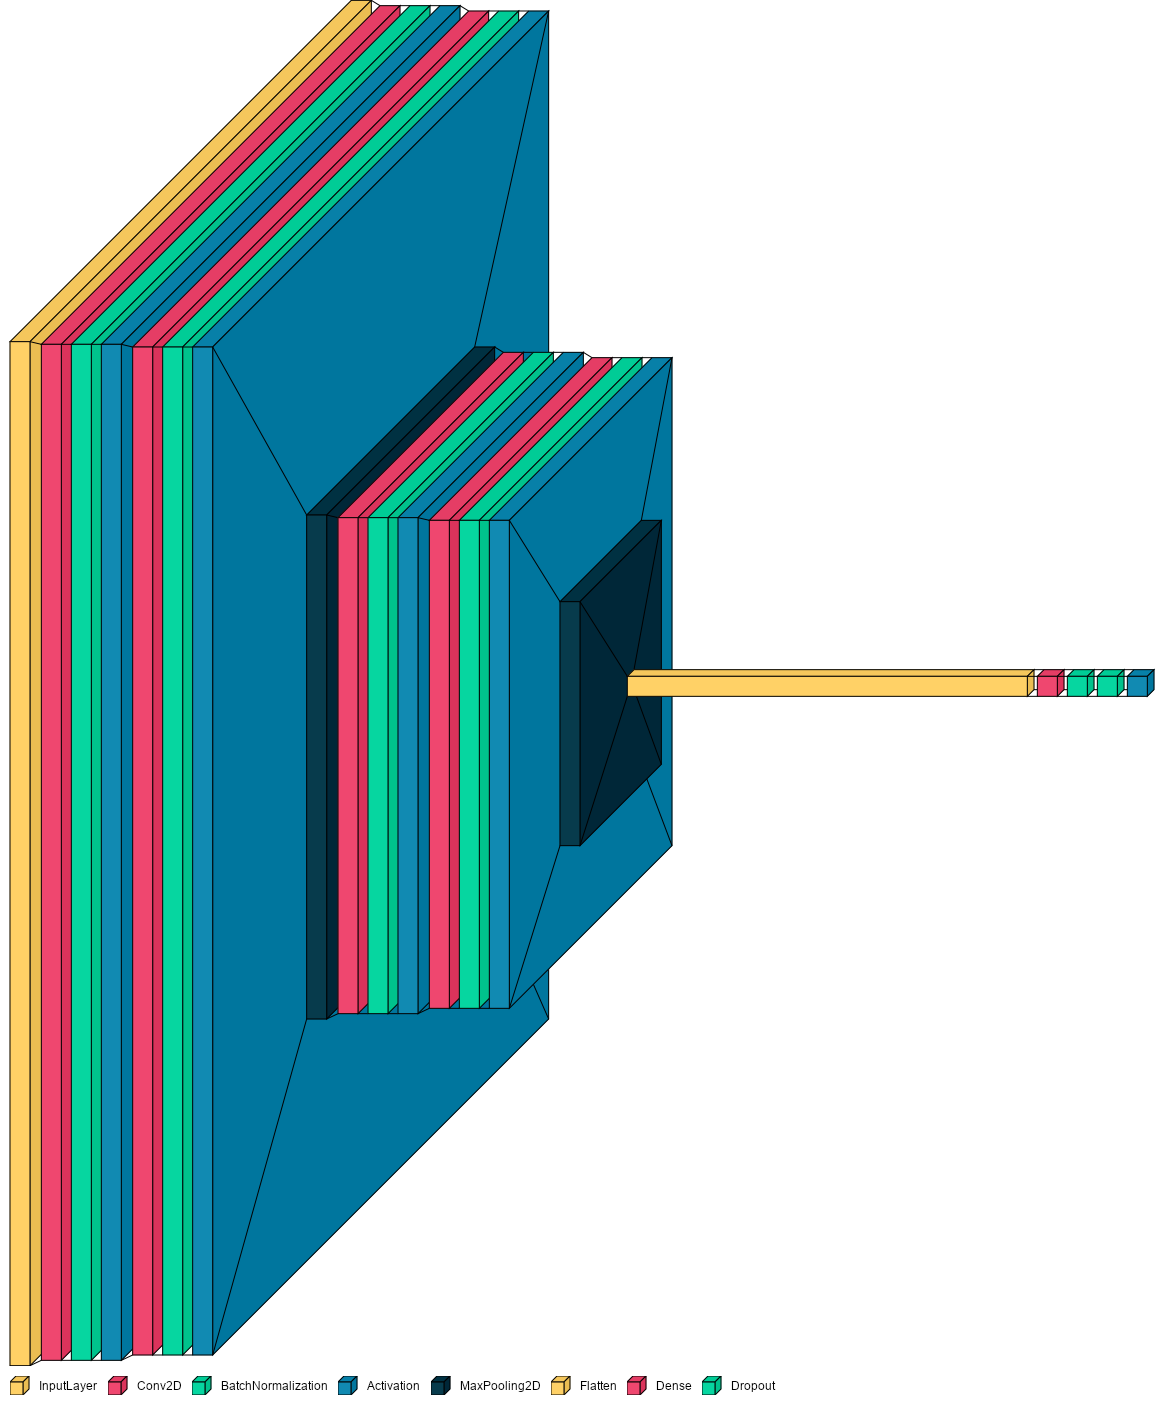

In [ ]:
from IPython.core.pylabtools import figsize
visualkeras.layered_view(similarity_model, legend=True) # without custom font

from PIL import ImageFont
font = ImageFont.truetype("/content/arial.ttf", 12)
#plt.figure(figsize=(10,10))
visualkeras.layered_view(feature_model, legend=True, font=font) # selected font


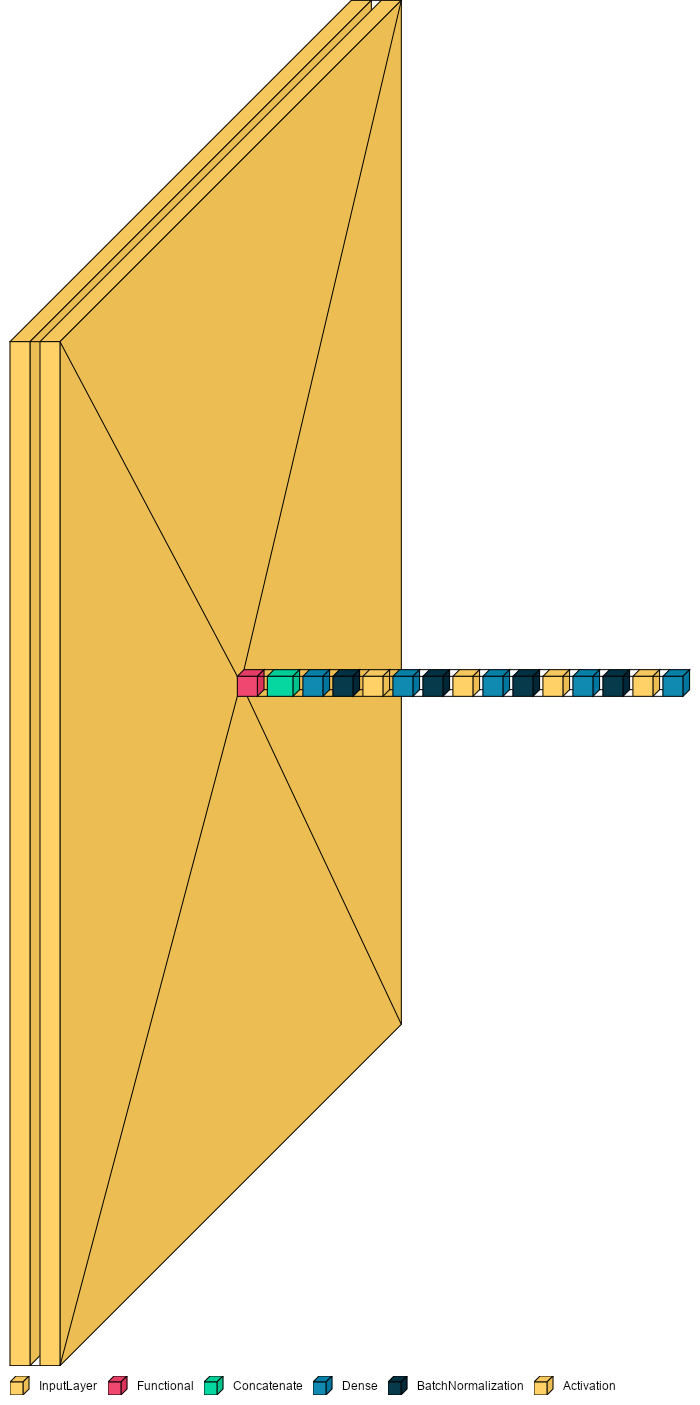

In [ ]:
from IPython.core.pylabtools import figsize
visualkeras.layered_view(similarity_model, legend=True) # without custom font

from PIL import ImageFont
font = ImageFont.truetype("/content/arial.ttf", 12)
#plt.figure(figsize=(10,10))
visualkeras.layered_view(similarity_model, legend=True, font=font) # selected font
